# Ramsey King
# DSC 650 Assignment 6
# 9 Jan 2022

## Assignment 6.1
### Using section 5.1 in Deep Learning with Python as a guide (listing 5.3 in particular), create a ConvNet model that classifies images in the MNIST digit dataset. Save the model, predictions, metrics, and validation plots.

In [32]:
# From 5.1 Listing - Instantiating a small convnet
from keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [33]:
# From 5.2 Listing - Adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [35]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 56s 929us/step - loss: 0.1744 - accuracy: 0.9451
Epoch 2/5
60000/60000 [==============================] - 58s 962us/step - loss: 0.0462 - accuracy: 0.9861
Epoch 3/5
60000/60000 [==============================] - 43s 712us/step - loss: 0.0340 - accuracy: 0.9896
Epoch 4/5
60000/60000 [==============================] - 42s 693us/step - loss: 0.0252 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 42s 700us/step - loss: 0.0204 - accuracy: 0.9940


In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 2s 212us/step


0.9921000003814697

In [37]:
history = model.fit(train_images, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 50s 826us/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0555 - val_accuracy: 0.9889
Epoch 2/30
60000/60000 [==============================] - 51s 846us/step - loss: 0.0253 - accuracy: 0.9931 - val_loss: 0.0378 - val_accuracy: 0.9908
Epoch 3/30
60000/60000 [==============================] - 49s 819us/step - loss: 0.0218 - accuracy: 0.9943 - val_loss: 0.0531 - val_accuracy: 0.9897
Epoch 4/30
60000/60000 [==============================] - 50s 841us/step - loss: 0.0201 - accuracy: 0.9951 - val_loss: 0.0592 - val_accuracy: 0.9894
Epoch 5/30
60000/60000 [==============================] - 53s 885us/step - loss: 0.0198 - accuracy: 0.9955 - val_loss: 0.0419 - val_accuracy: 0.9920
Epoch 6/30
60000/60000 [==============================] - 53s 890us/step - loss: 0.0200 - accuracy: 0.9952 - val_loss: 0.0464 - val_accuracy: 0.9914
Epoch 7/30
60000/60000 [==============================] 

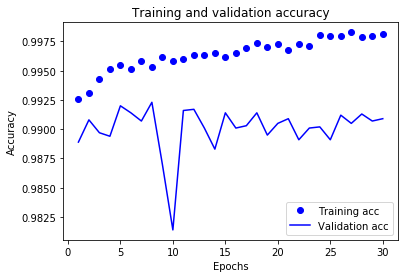

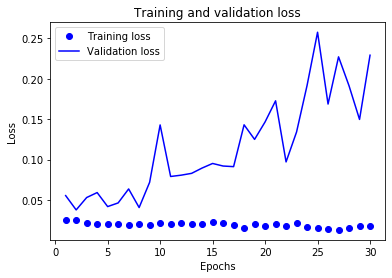

In [38]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Assignment 6.2

### Assignment 6.2a
### Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. Save the model, predictions, metrics, and validation plots.

In [39]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [40]:
# https://www.geeksforgeeks.org/cifar-10-image-classification-in-tensorflow/
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [41]:
# Reduce pixel values
x_train, x_test = x_train/255.0, x_test/255.0

# Flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

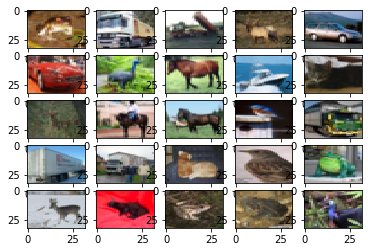

In [42]:
# visualize some of the data
fig, ax = plt.subplots(5,5)
k=0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k+=1

plt.show()

In [43]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train[0].shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))

# Hidden layer
model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.2))

# last hidden layer i.e.. output layer
model.add(layers.Dense(K, activation='softmax'))

# model description
model.summary()

number of classes: 10
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_27 (Batc (No

In [44]:
# compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 437s 9ms/step - loss: 1.1701 - accuracy: 0.5924 - val_loss: 0.9539 - val_accuracy: 0.6694
Epoch 2/10
50000/50000 [==============================] - 435s 9ms/step - loss: 0.7350 - accuracy: 0.7431 - val_loss: 0.8288 - val_accuracy: 0.7126
Epoch 3/10
50000/50000 [==============================] - 431s 9ms/step - loss: 0.5681 - accuracy: 0.8049 - val_loss: 0.6778 - val_accuracy: 0.7695
Epoch 4/10
50000/50000 [==============================] - 429s 9ms/step - loss: 0.4512 - accuracy: 0.8443 - val_loss: 0.7295 - val_accuracy: 0.7628
Epoch 5/10
50000/50000 [==============================] - 428s 9ms/step - loss: 0.3518 - accuracy: 0.8768 - val_loss: 0.6468 - val_accuracy: 0.8040
Epoch 6/10
50000/50000 [==============================] - 429s 9ms/step - loss: 0.2617 - accuracy: 0.9083 - val_loss: 0.7721 - val_accuracy: 0.7912
Epoch 7/10
50000/50000 [==============================] - 430s

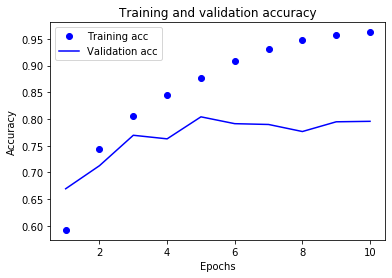

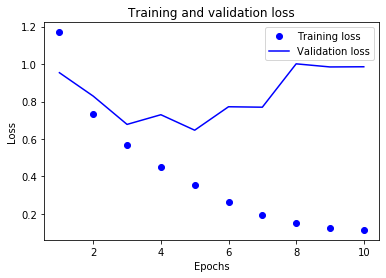

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Original label is cat and predicted label is cat


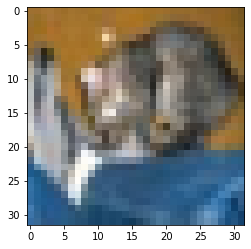

In [47]:
# Now a prediction will be made.
# label mapping
import numpy as np

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))



Original label is airplane and predicted label is airplane


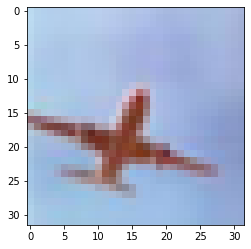

In [48]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 5722

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


## Assignment 6.2

### Assignment 6.2b
### Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time include dropout and data-augmentation. Save the model, predictions, metrics, and validation plots.

In [49]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
model_do_and_da = models.Sequential()

model_do_and_da.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train[0].shape))
model_do_and_da.add(layers.BatchNormalization())
model_do_and_da.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_do_and_da.add(layers.BatchNormalization())
model_do_and_da.add(layers.MaxPooling2D((2, 2)))

model_do_and_da.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_do_and_da.add(layers.BatchNormalization())
model_do_and_da.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_do_and_da.add(layers.BatchNormalization())
model_do_and_da.add(layers.MaxPooling2D((2, 2)))

model_do_and_da.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_do_and_da.add(layers.BatchNormalization())
model_do_and_da.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_do_and_da.add(layers.BatchNormalization())
model_do_and_da.add(layers.MaxPooling2D((2, 2)))

model_do_and_da.add(layers.Flatten())
model_do_and_da.add(layers.Dropout(0.2))

# Hidden layer
model_do_and_da.add(layers.Dense(1024, activation='relu'))
model_do_and_da.add(layers.Dropout(0.2))

# last hidden layer i.e.. output layer
model_do_and_da.add(layers.Dense(K, activation='softmax'))

# model description
model_do_and_da.summary()

number of classes: 10
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_33 (Batc (No

In [50]:
# compiling the model
model_do_and_da.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_do_and_da = model_do_and_da.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 379s 8ms/step - loss: 1.2515 - accuracy: 0.5706 - val_loss: 1.0583 - val_accuracy: 0.6391
Epoch 2/10
50000/50000 [==============================] - 372s 7ms/step - loss: 0.8304 - accuracy: 0.7122 - val_loss: 0.7407 - val_accuracy: 0.7427
Epoch 3/10
50000/50000 [==============================] - 378s 8ms/step - loss: 0.6884 - accuracy: 0.7611 - val_loss: 0.7651 - val_accuracy: 0.7483
Epoch 4/10
50000/50000 [==============================] - 379s 8ms/step - loss: 0.5873 - accuracy: 0.7999 - val_loss: 0.7765 - val_accuracy: 0.7404
Epoch 5/10
50000/50000 [==============================] - 373s 7ms/step - loss: 0.5015 - accuracy: 0.8266 - val_loss: 0.6353 - val_accuracy: 0.7889
Epoch 6/10
50000/50000 [==============================] - 373s 7ms/step - loss: 0.4289 - accuracy: 0.8526 - val_loss: 0.7630 - val_accuracy: 0.7686
Epoch 7/10
50000/50000 [==============================] - 377s

In [51]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
from keras import preprocessing
batch_size = 32
data_generator = preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model_do_and_da.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=10)


Epoch 1/10
1562/1562 [==============================] - 383s 245ms/step - loss: 0.6254 - accuracy: 0.7937 - val_loss: 0.5605 - val_accuracy: 0.8212
Epoch 2/10
1562/1562 [==============================] - 382s 245ms/step - loss: 0.5453 - accuracy: 0.8178 - val_loss: 0.6265 - val_accuracy: 0.7864
Epoch 3/10
1562/1562 [==============================] - 383s 245ms/step - loss: 0.5053 - accuracy: 0.8264 - val_loss: 0.6262 - val_accuracy: 0.7954
Epoch 4/10
1562/1562 [==============================] - 384s 246ms/step - loss: 0.4741 - accuracy: 0.8387 - val_loss: 0.5587 - val_accuracy: 0.8132
Epoch 5/10
1562/1562 [==============================] - 383s 245ms/step - loss: 0.4529 - accuracy: 0.8464 - val_loss: 0.5479 - val_accuracy: 0.8223
Epoch 6/10
1562/1562 [==============================] - 382s 245ms/step - loss: 0.4304 - accuracy: 0.8521 - val_loss: 0.5591 - val_accuracy: 0.8199
Epoch 7/10
1562/1562 [==============================] - 384s 246ms/step - loss: 0.4109 - accuracy: 0.8595 - val_

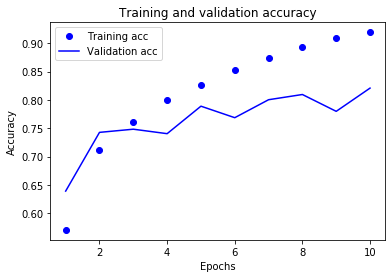

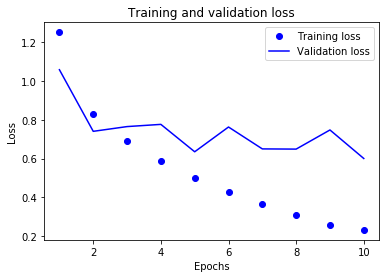

In [52]:
acc = history_do_and_da.history['accuracy']
val_acc = history_do_and_da.history['val_accuracy']
loss = history_do_and_da.history['loss']
val_loss = history_do_and_da.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Original label is cat and predicted label is cat


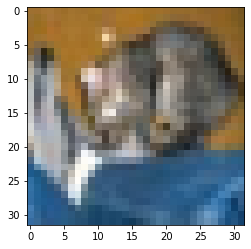

In [53]:
# Now a prediction will be made.
# label mapping
import numpy as np

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


## Assignment 6.3

### Load the ResNet50 model.  Perform image classification on five to ten images of your choice.  They can be personal images or publicly available images.  Include the images in dsc650/assignments/assignment06/images/. Save the predictions dsc650/assignments/assignment06/results/predictions/resnet50 directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [56]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'images/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])



40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02504458', 'African_elephant', 0.67766213), ('n02408429', 'water_buffalo', 0.14404598), ('n02397096', 'warthog', 0.081772886)]


In [58]:
model = ResNet50(weights='imagenet')

image_one = 'images/elephant.jpg'
image_two = 'images/elephant2.jpg'
image_three = 'images/elephant3.jpg'
image_four = 'images/elephant4.jpg'
image_five = 'images/elephant5.jpg'


def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])

predict_image(image_one)
predict_image(image_two)
predict_image(image_three)
predict_image(image_four)
predict_image(image_five)

Predicted: [('n02504458', 'African_elephant', 0.67766213), ('n02408429', 'water_buffalo', 0.14404598), ('n02397096', 'warthog', 0.081772886)]
Predicted: [('n02504458', 'African_elephant', 0.80182576), ('n01871265', 'tusker', 0.18549429), ('n02504013', 'Indian_elephant', 0.012507719)]
Predicted: [('n01871265', 'tusker', 0.8336162), ('n02504458', 'African_elephant', 0.0908248), ('n02504013', 'Indian_elephant', 0.03236152)]
Predicted: [('n01871265', 'tusker', 0.5943159), ('n02504013', 'Indian_elephant', 0.39140233), ('n02504458', 'African_elephant', 0.014043428)]
Predicted: [('n02504013', 'Indian_elephant', 0.55745864), ('n01871265', 'tusker', 0.44149777), ('n02504458', 'African_elephant', 0.0010432437)]
